# Python Recitation - Part 2

## Reminders from Part 1:
In the first recitation we covered:
- Jupyter Notebooks: how to open, navigate, save these files
- Key advantages/challenges of Python (especially when in comparison to Matlab)
- Key differences in indexing, arrays/matrices in Python vs Matlab
- Importing modules/packages/libraries
- Python lists and numpy arrays
- Creating if/else, for statements
- Creating functions
- Plotting data


In this second part, the learning outcomes are:

- Use basic operators
- Learn how to read data from excel files using "pandas"
- Learn how to create, edit, manipulate Python dataframes
- Plot 2-dimensional data
- Optimize a function using simple Python solvers


### Basic Operators in Python

- Arithetic operators are mostly the same with Matlab: 

$ + $ add </br> 
$ - $ subtract </br>
$ / $ divide </br>
$ // $ integer division </br>
$ ** $ power </br>

- Equalities/Logical Statements:

Comparisons can be made using 
$ \le, \ge, ==, \lt, \gt $


In [3]:
print(3+2)
print(3/2)
print(3//2)
print(3**2)

print(2>1)
print(2==2)

5
1.5
1
9
True
True


### Different types of data structures in Python

So far we have seen lists and numpy arrays (see simple reminders below).

However, when dealing with more complex data sets, with multiple columns and rows, you can use more sophisticated forms of data structures that enable more efficient manipulation, accessing of specific rows/columns, labeling, visualizing etc. 

The types we'll learn today are: 
- Dictionaries (*like lists with key-value pairs*)
- DataFrames (*some similarities exist to these in Matlab, if you use Matlab's "readtable" to read data from external file*).




In [4]:
#Dictionaries:

#Reminder of lists:
list_example = [1.0,2.0,3.0]
print(list_example)

#Dictionary has labels for elements of list:
dict_example = {"parameter1": 1.0, "parameter2": 2.0, "parameter3":3.0}
print(dict_example)

#Lists and dictionaries can have different types in their elements:
mixed_dict = {"p1":1, "p2":"A", "p3": 0.4}
print(mixed_dict)

[1.0, 2.0, 3.0]
{'parameter1': 1.0, 'parameter2': 2.0, 'parameter3': 3.0}
{'p1': 1, 'p2': 'A', 'p3': 0.4}


#### Accessing, Manipulating Dictionaries:

You can access different elements of dictionaries, add new elements etc as follows:



In [5]:
# Print the first element of list/dictionary:
print(list_example[0])
print(mixed_dict["p1"])

# Add an element to end of dict_example:

dict_example["parameter4"] = 4.0
print(dict_example)

1.0
1
{'parameter1': 1.0, 'parameter2': 2.0, 'parameter3': 3.0, 'parameter4': 4.0}


### DataFrames

- Often you've created a dataset outside of Python (for example, in ASPEN or in your experimental lab), but you'd like to import them in Python for further analysis, plotting etc. 
- These files are usually in Excel or csv format
- A very useful library for reading/writing these external files is "pandas"
- When reading external data using pandas, they are created as a *DataFrame* structure.
- First, to see connections/similarities/differences of DataFrames with lists or dictionaries, let's convert them into DataFrames

In [6]:
# Example from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
# Convert a 2D dictionary into a DataFrame:

import pandas as pd
import numpy as np

d = {"col1": [1,2], "col2" : [3,4]}
print(d)

df = pd.DataFrame(data=d)
print(df)

#Convert a nd.array into a DataFrame:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A)

df2 = pd.DataFrame(A, columns = ['col1','col2','col3'])
print(df2)



{'col1': [1, 2], 'col2': [3, 4]}
   col1  col2
0     1     3
1     2     4
[[1 2 3]
 [4 5 6]
 [7 8 9]]
   col1  col2  col3
0     1     2     3
1     4     5     6
2     7     8     9


### Exercise: Add row names to df2. I will not show you how to do this, but you can use any resources available to you to do it. 

Examples of resources:
1. Copy line of code creating df2 and start typing, you'll see a list of attributes you can set.
2. Google pandas dataframe, add row labels, find an example
3. Go to https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html and see the list of attributes you can set
4. Use the help() function

In [7]:
# Exercise solution
df2 = pd.DataFrame(A, columns = ['col1','col2','col3'],index=['r1','r2','r3'])
print(df2)
#add row names:

#print new df2:

    col1  col2  col3
r1     1     2     3
r2     4     5     6
r3     7     8     9


#### Reading from excel file using Pandas

In this example, we will learn how to import an excel file in this workspace and then read it into Python to create a DataFrame

In [8]:
# Reading an Excel File in Pandas
import pandas as pd

data = pd.read_excel('sample.xlsx')
print(data)

#df.to_excel("output.xlsx")

  Unnamed: 0  Var1  Var2  Var3        Var4
0    Sample1   100    10   0.8    Feasible
1    Sample2   130     5   0.7  Infeasible
2    Sample3   140    15   0.9    Feasible


What is wrong with the above code?

- Rows/Columns not named correctly 
- Row names have been made into column

In [9]:
# You need to specify that the first column of excel sheet contains labels for rows: (use index_col)
data = pd.read_excel('sample.xlsx',index_col=0)
print(data)

         Var1  Var2  Var3        Var4
Sample1   100    10   0.8    Feasible
Sample2   130     5   0.7  Infeasible
Sample3   140    15   0.9    Feasible


### DataFrame manipulations:

You can do all sorts of things with dataframes, like drop a row or column, add a row/column, calculate averages etc.

Below are some examples:

In [10]:
data_num = data.drop("Var4", axis = 1)
print(data_num)

less_data = data.drop("Sample3", axis = 0)
print(less_data)

#Access only 1 column:
print(data['Var4'])

#Access 1 element:
print(data.loc['Sample1']['Var1'])

#Access rows based on condition:
print(data[data.Var1 >= 130])

#Calculate statistics:
data_mean = data_num.mean(axis = 0)
print(data_mean)

         Var1  Var2  Var3
Sample1   100    10   0.8
Sample2   130     5   0.7
Sample3   140    15   0.9
         Var1  Var2  Var3        Var4
Sample1   100    10   0.8    Feasible
Sample2   130     5   0.7  Infeasible
Sample1      Feasible
Sample2    Infeasible
Sample3      Feasible
Name: Var4, dtype: object
100
         Var1  Var2  Var3        Var4
Sample2   130     5   0.7  Infeasible
Sample3   140    15   0.9    Feasible
Var1    123.333333
Var2     10.000000
Var3      0.800000
dtype: float64


#### 2D Visualization Example:

In the following example, we will use a defined function to generate input (x,y) and output (z) data and:
- Visualize it in a 2d plot
- Optimize the function using Python solvers (fmin of Matlab)

Relation to ChBE 4510:
- Let's assume this is a data set where x is temperature, y is pressure, z is duty from a process.
- We have collected sensitivity analysis data from ASPEN and we have fit a correlation that describes x,y --> z relationship (more on how to do this in next recitation!)

- We want to find the temperature and pressure to minimize duty.

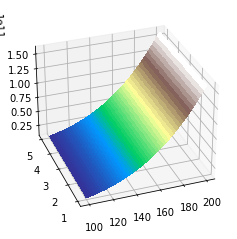

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

x = np.linspace(100,200)
y = np.linspace(1,5)

def f(x, y):
    return (1.0-x)**2+100*(y-x**2)**2 

X, Y = np.meshgrid(x,y)
Z = np.zeros((50,50))


for i in range(50):
    for j in range(50):
        Z[i,j] = f(X[i,j],Y[i,j])

fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Z,linewidth=0, antialiased=False,cmap='terrain')
ax.view_init(30, -110)
plt.show()

### 2D Optimization Example 

The good thing about having a function is that we can find the minimum mathematically (not just visually)

Python has a similar library of Mimimization solvers to help you do this.

This is very similar to Matlab's fmin or fmincon functions



In [12]:
import scipy.optimize as opt

def f(x):
    return (1.0-x[0])**2+100*(x[1]-x[0]**2)**2 


x0 = [140,5]
res = opt.minimize(f,x0,method='nelder-mead')
print(res.x)

[0.99998704 0.99997583]


What is the problem with this solution?

Final Exercise: Figure out how to add bounds

In [13]:
bnds = ((100, 200), (1, 5))
x0 = [140,5]
res = opt.minimize(f, x0, method='TNC', bounds=bnds)
print(res.x)

[100.   5.]
